<a href="https://colab.research.google.com/github/ronniegertman/harmonic-oscillator/blob/labExp1/harmonic_oscilator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#constants
lines = 241
length = (72.4 - 60)/100 #m
counts_to_meter = length/lines #m
length_err = 1/1000 #m
cart_with_magnets = 212.85 / 1000 #kg
weight_err = 1/1000 #N/m


In [3]:
#dependencies
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress as linreg
from scipy.optimize import curve_fit as cfit
from sklearn.metrics import r2_score
from scipy.signal import find_peaks
import scipy.ndimage as ndimage
from prettytable import PrettyTable as prtable


omega version 1:  6.283185307179586 Hz


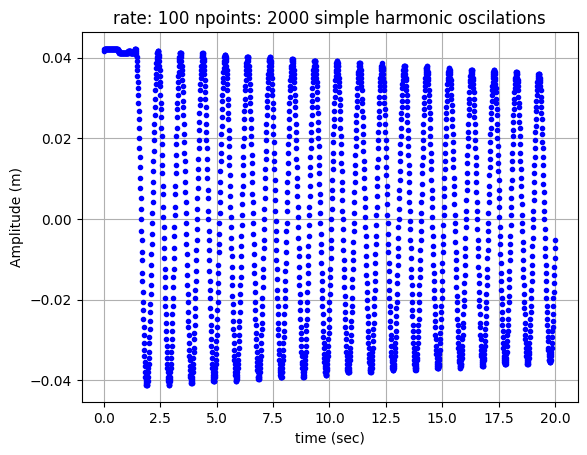

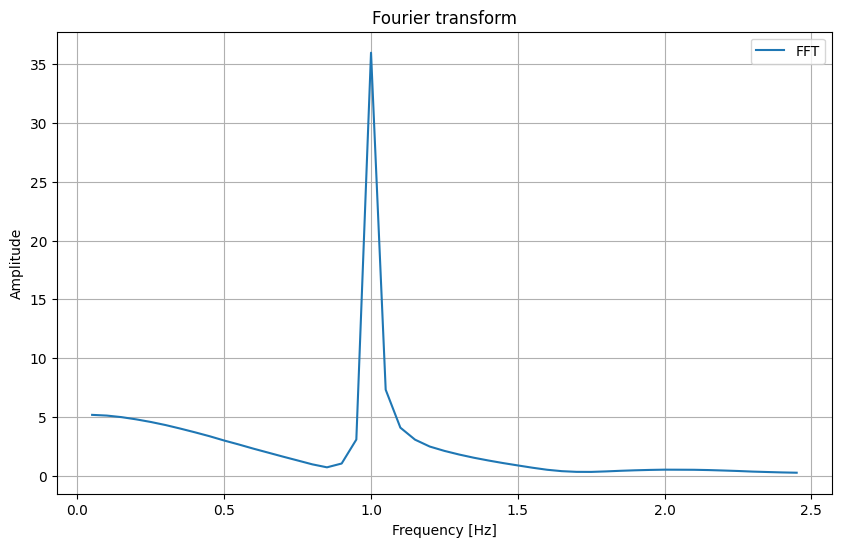

width is  4.24136947622285
omega version 2:  6.283185307179586 Hz


<Figure size 640x480 with 0 Axes>

In [27]:
#first experiment
r100n2000 = pd.read_csv("rate100_npoints_2000.csv")
time100 = r100n2000['time(s)'].values
counts100 = r100n2000['count B'].values
x100 = counts100 * counts_to_meter

plt.figure()
plt.plot(time100,x100,'b.')
plt.xlabel('time (sec)')
plt.ylabel('Amplitude (m)')
plt.title("rate: 100 npoints: 2000 simple harmonic oscilations")
plt.grid()
plt.savefig("rate100_npoints2000.png")

def calc_varience(amplitudes):
  return np.var(amplitudes[10:25])

def calc_freq_simple(dt, Nperiods):
  return 2*np.pi*Nperiods/dt

def calc_freq_fourier(time, x):
  dt = time[1] - time[0]
  fs = 1 / dt

  fft_result = np.fft.fft(x)
  frequencies = np.fft.fftfreq(len(x), dt)

  positive_frequencies = frequencies[frequencies >= 0]
  positive_amplitude = np.abs(fft_result[frequencies >= 0])

  plt.figure(figsize=(10,6))
  plt.plot(positive_frequencies[1:50], positive_amplitude[1:50], label="FFT")
  plt.title("Fourier transform")
  plt.xlabel("Frequency [Hz]")
  plt.ylabel("Amplitude")
  plt.grid()
  plt.legend()
  plt.show()
  plt.savefig("fft.png")


  var = calc_varience(positive_amplitude)
  print("width is ", np.sqrt(var)/2)

  delta_omega_index = np.argmax(positive_amplitude) #finding the highest amplitude
  return 2*np.pi*positive_frequencies[delta_omega_index] #returning the corresponding freq


dt_100 = 7.5-2.5
Nperiods_100 = 5
omega100_1 = calc_freq_simple(dt_100, Nperiods_100)
print("omega version 1: ", omega100_1, "Hz")

omega100_2 = calc_freq_fourier(time100, x100)
print("omega version 2: ", omega100_2, "Hz")








omega version 1:  6.283185307179586 Hz


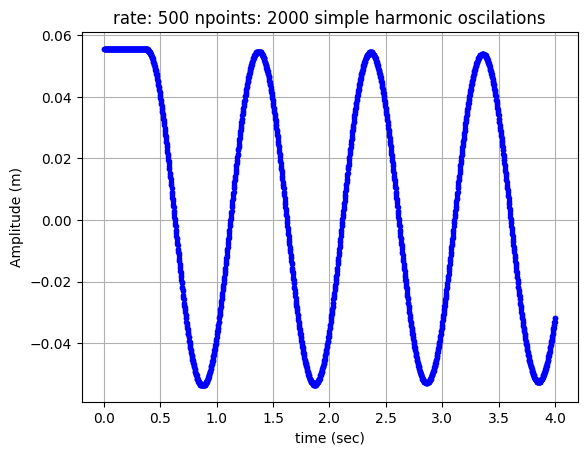

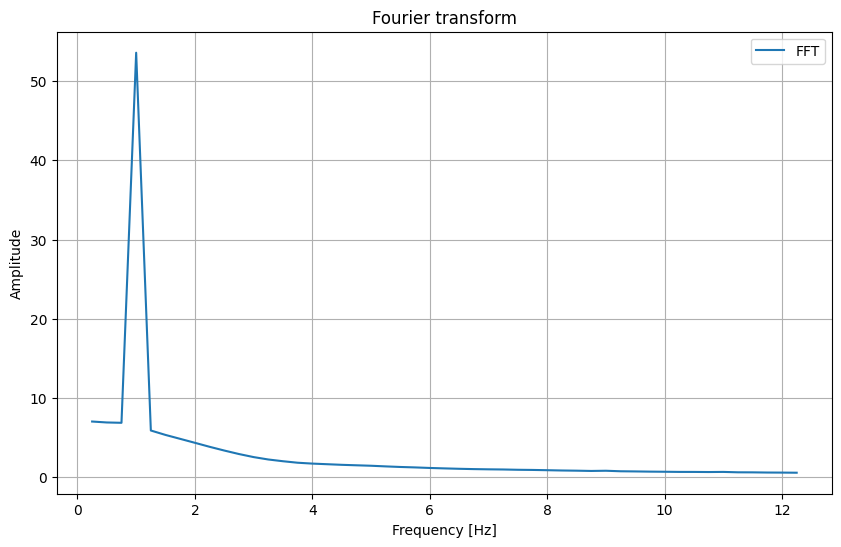

width is  0.3143650169572955
omega version 2:  6.283185307179586 Hz


<Figure size 640x480 with 0 Axes>

In [28]:
#first experiment
r500n2000 = pd.read_csv("rate500_npoints2000.csv")
time500 = r500n2000['time(s)'].values
counts500 = r500n2000['count B'].values
x500 = counts500 * counts_to_meter

plt.figure()
plt.plot(time500,x500,'b.')
plt.xlabel('time (sec)')
plt.ylabel('Amplitude (m)')
plt.title("rate: 500 npoints: 2000 simple harmonic oscilations")
plt.grid()

dt_500 = 3-2
Nperiods_500 = 1
omega500_1 = calc_freq_simple(dt_500, Nperiods_500)
print("omega version 1: ", omega500_1, "Hz")

omega500_2 = calc_freq_fourier(time500, x500)
print("omega version 2: ", omega500_2, "Hz")






In [17]:
#second exp2
dl = 97.95 #mm

k1 = (46.38-3.59)/dl*9.8 #N/m
k2 = (44.2+0.3)/dl*9.8 #N/m

k_err = weight_err
cart_weight = 206.35/1000 #kg

omega0_sq = (k1+k2)/cart_weight
omega0_sq_err = np.sqrt(2*((k_err/cart_weight)**2)+(weight_err*(k1+k2)/(cart_weight**2))**2)
print("frequency= " ,np.sqrt(omega0_sq))
print("err= " ,omega0_sq_err)



frequency=  6.505651992679968
err=  0.20521991174961118


omega0 is  6.225624486793281 Hz
error omega0 is  4.4124889109473705e-07
tau error is  0.00013449757667771006


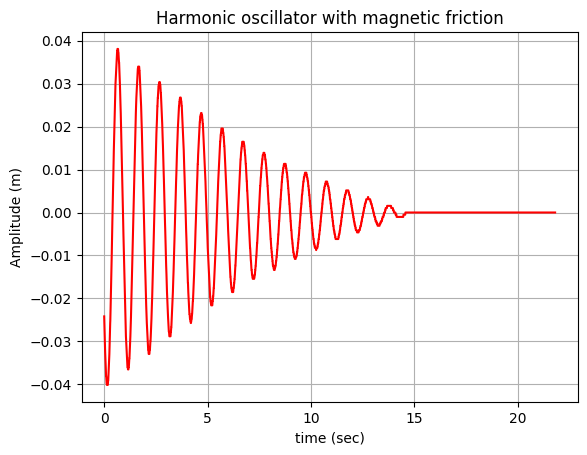

In [32]:
 #third experiment
magnets_data = pd.read_csv("magnets.csv")
time = magnets_data['time(s)'].values
counts = magnets_data['count B'].values
x = counts * counts_to_meter

def f(t, A, tau, w0, phi):
  w1 = np.sqrt(w0**2 - ((1/(2*tau))**2))
  return A*np.exp(-1*t/(2*tau))*np.cos(w1*t+phi)

p0 = ([20,3,6, 0])
params,cov = cfit(f,time,x,p0=p0)
plt.figure()
# plt.plot(time, f(time, *params), 'b-')
plt.plot(time,x, 'r-')
plt.xlabel('time (sec)')
plt.ylabel('Amplitude (m)')
plt.title("Harmonic oscillator with magnetic friction")
plt.grid()
plt.savefig("magnets.png")

A = params[0]
w0 = params[2]
tau = params[1]
error_omega0 = cov[2][2]
tau_error = cov[1][1]
print("omega0 is ", w0, "Hz")
print("error omega0 is ", error_omega0)
print("tau error is ", tau_error)



In [69]:
#resonance - second exp
#wo from the prev exp

def phase(omega, omega0, tau):
  #param omega: rate of engine
  #param omega0: rate of resonance
  #param tau: decay factor
  #return: phase between engine and oscilator
  phi = np.arctan(-1*omega/(tau * (omega0**2 - omega**2)))
  return phi

def amplitude(omega, F0, m, omega0, tau):
   #param omega: rate of engine
   #param omega0: rate of resonance
   #param tau: decay factor
   #param m: mass of cart
   #param F0: amplitude of engine
   squareroot = np.sqrt((omega0**2 - omega**2)**2 + (omega/tau)**2)
   return F0/m/squareroot



omega0 is  6.225624486793281
tau is  2.9915941980140115


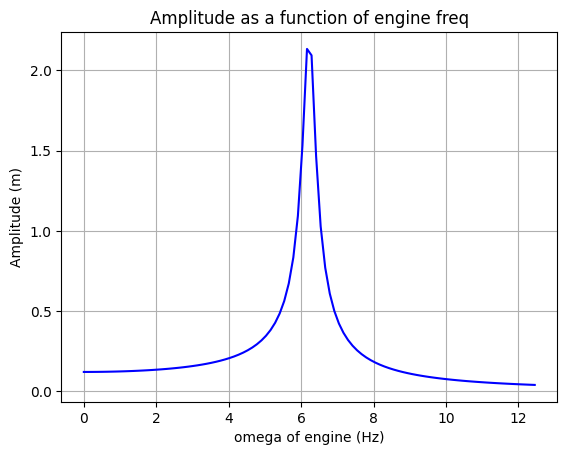

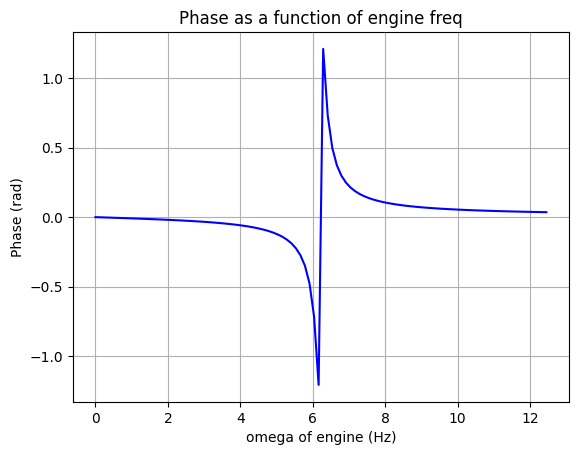

In [74]:
#1:
print("omega0 is ", w0)
print("tau is ", tau)

#2: do linspace on omega from 0 to 2w0 and create graph of x, phi
omega_vec = np.linspace(0, 2*w0, 100)
amplitude_vec = amplitude(omega_vec, 1, cart_with_magnets, w0, tau)
plt.figure()
plt.plot(omega_vec,amplitude_vec,'b-')
plt.xlabel('omega of engine (Hz)')
plt.ylabel('Amplitude (m)')
plt.title("Amplitude as a function of engine freq")
plt.grid()

plt.figure()
phi_vec = phase(omega_vec, w0, tau)
plt.plot(omega_vec, phi_vec, 'b-')
plt.xlabel('omega of engine (Hz)')
plt.ylabel('Phase (rad)')
plt.title("Phase as a function of engine freq")
plt.grid()

#


#3: rate of measurement: 200, npoints: 2000
#a is engine, b is oscilator




In [66]:
def calc_freq_fourier(time, x):
  dt = time[1] - time[0]
  fs = 1 / dt

  fft_result = np.fft.fft(x)
  frequencies = np.fft.fftfreq(len(x), dt)

  positive_frequencies = frequencies[frequencies >= 0]
  positive_amplitude = np.abs(fft_result[frequencies >= 0])

  # plt.figure(figsize=(10,6))
  # plt.plot(positive_frequencies, positive_amplitude, label="FFT")
  # plt.title("Fourier transform")
  # plt.xlabel("Frequency [Hz]")
  # plt.ylabel("Amplitude")
  # plt.grid()
  # plt.legend()
  # plt.show()

  delta_omega_index = np.argmax(positive_amplitude) #finding the highest amplitude
  return 2*np.pi*positive_frequencies[delta_omega_index] #returning the corresponding freq


In [67]:
import os
import json

directory = os.getcwd()
data = {}
for root,dirs,files in os.walk(directory):
    for file in files:
       if file.endswith(".csv"):
        r = pd.read_csv(str(file))
        time = r['time(s)'].values
        counts = r['count B'].values
        x_oscilator = counts * counts_to_meter
        counts = counts = r['count A'].values
        x_engine = counts * counts_to_meter
        omega_engine = calc_freq_fourier(time, x_engine)
        omega_oscilator = calc_freq_fourier(time, x_oscilator)

        data[file] = {
            "x_oscilator": x_oscilator.tolist(),
            "x egine": x_engine.tolist(),
            "time": time.tolist(),
            "omega": omega_engine,
            "amp": (np.max(x_oscilator) - np.min(x_oscilator))/2
        }

        # plt.figure()
        # plt.plot(time,x_oscilator,'b.')
        # plt.plot(time,x_engine,'r.')
        # plt.grid()
        # plt.xlabel('time (sec)')
        # plt.ylabel('Amplitude (m)')
        # plt.title("omega engine is %d rad/sec" % omega_engine)



json_data = json.dumps(data)
with open("./data.json", 'w') as file:
  file.write(json_data)

omega resonance is  6.283185307179586


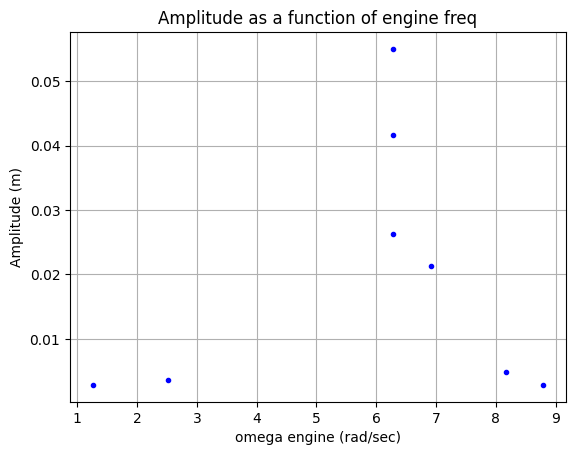

In [75]:
#finding A
with open('data.json', 'r') as file:
    omega_engine_vec  = []
    amp_vec = []
    data = json.load(file)
    for element in data:
        omega_engine_vec.append(data[element]['omega'])
        amp_vec.append(data[element]['amp'])

plt.figure()
plt.plot(omega_engine_vec, amp_vec, 'b.')
plt.xlabel('omega engine (rad/sec)')
plt.ylabel('Amplitude (m)')
plt.title("Amplitude as a function of engine freq")
plt.grid()

omega_res_index = np.argmax(amp_vec)
print("omega resonance is ", omega_engine_vec[omega_res_index])




omega is  1.4528666823721272
error is  2.1431793943246943e-05
omega is  8.226043224843439
error is  0.00022943780048765875
omega is  6.156247680886618
error is  0.0002926652905293875
omega is  6.511048883003938
error is  1.0771244381351616e-06
omega is  6.222617042269713
error is  2.181641982482196e-06
omega is  6.666704033616536
error is  2.29463630628809e-05
omega is  8.994849021509129
error is  3.836312721087974e-05
omega is  2.8424699449688857
error is  2.6169013725460235e-05


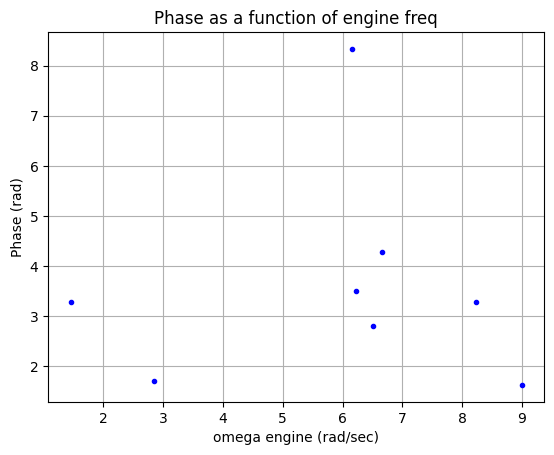

In [76]:
#finding phi:
def phi_func(t, x, w, phi, b):
  return x * np.cos(w*t + phi) + b


phi_vec = []
omega_v = []
for element in data:
    omega_engine = data[element]['omega']
    amp = data[element]['amp']
    p0 = ([amp, omega_engine, 3, 1])
    time = np.array(data[element]['time'])
    x = np.array(data[element]['x_oscilator'])
    params,cov = cfit(phi_func,time,x,p0=p0)

    phi_vec.append(params[2])
    omega_v.append(params[1])
    print("omega is ", params[1])
    print("error is ", cov[2][2])

plt.figure()

phi_vec = np.array(phi_vec)

plt.plot(omega_v, phi_vec, 'b.')
plt.xlabel('omega engine (rad/sec)')
plt.ylabel('Phase (rad)')
plt.title("Phase as a function of engine freq")
plt.grid()





